# <span style="color:#ffa500">12 | LINEAR MODELING USING THE _F_ DISTRIBUTION</span>

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><span property="dct:title">This chapter of an Introduction to Health Data Science</span> by <span property="cc:attributionName">Dr JH Klopper</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-nd/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-NonCommercial-NoDerivatives 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nd.svg?ref=chooser-v1"></a></p>

## <span style="color:#0096FF">Introduction</span>

This chapter explores the linear association between variables examining correlation and linear regression.

Correlation is a measure of the strength and direction of the linear relationship between two variables. It is a number between -1 and 1. A correlation of 1 indicates a perfect positive linear relationship, while a correlation of -1 indicates a perfect negative linear relationship. A correlation of 0 indicates no linear relationship.

Simple linear regression is a statistical method used to model the relationship between two variables. It is used to predict the value of one variable based on the value of another variable. The variable being predicted is called the dependent variable, while the variable being used to make the prediction is called the independent variable.

## <span style="color:#0096FF">Packages used in this notebook</span>

The following packages are used in this notebook.

In [1]:
import numpy as np
from scipy import stats
from scipy import special
from pandas import DataFrame

In [2]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = 'plotly_white'

Some of the models that used in this notebook requires the data to be in a specific format. The patsy package is excellent for data formatting. The statsmodels package provides functions with which models are built.

In [3]:
from patsy import dmatrices
import statsmodels.api as sm

## <span style="color:#0096FF">Correlation</span>

This section develops the intuition for how the change in one numerical variable affects a change in another numerical variable. In this case, pairs of values (for each subject in a sample) are used to determine the correlation. One of the variables is termed the __independent variable__ and the other the __dependent variable__.

Below, a single independent and a single dependent variable are created. The former takes $50$ samples from a __uniform distribution__ on the interval $\left[ 80, 100 \right]$. To generate the dependent variable, some random noise is added to each value in the independent variable. This random noise is taken from a normal distribution with a mean of $0$ and a standard deviation of $5$. The numpy `round` function is also used and set to the value of $1$ to indicate that rounding to a single decimal place.

In [4]:
# Seed the numpy pseudo-random number generator with the integer 7
np.random.seed(7) # For reproducible results

# Generate two numpy arrays
independent = np.round(np.random.uniform(low=80, high=100, size=50), 1)
dependent = np.round(independent + np.random.normal(0, 5, 50), 1)

A scatter plot, where each marker (dot) represent the value for each variable is shown below. The independent variable is on the horizontal axis and the dependent variable is on the vertical axis.

In [5]:
# Generate a scatter plot of the data
fig = go.Figure(
    go.Scatter(
        x=independent,
        y=dependent,
        mode='markers',
        marker=dict(size=12)
    )
)

fig.update_layout(
    title='Scatter plot of data',
    xaxis_title='Independent variable',
    yaxis_title='Dependent variable',
    width=700
)

fig.show()

For any given subject the dependent variable value is higher if the independent variable is higher. There is some _correlation_ between the two variables, i.e. as one changes so does the other.

The variance is the average squared difference between each variable value and the mean for that variable, shown in (1) for a variable $X$, its data values $x_{i}$, its mean $\bar{X}$, and it sample size $n$. Remember that this is the equation for a sample variance and that for a population variance, The denomintor is $N$, the population size.

$$\text{var}\left( X \right) = \frac{\sum_{i=1}^{n}{{\left( x_{i} - \bar{X} \right)}^{2}}}{n - 1} \tag{1}$$

The numpy `sum` function sums over the squares of all the differences. It is used below, after which followsdivision by the sample size less $1$.

In [6]:
# Use numpy to calculate the variance using the equation for sample variance
np.sum((independent - np.mean(independent))**2) / (len(independent) - 1)

np.float64(27.3082)

The numpy `var` function calculates this variance given an array of values. The `ddof` is the degrees of freedom. Since there is only one set of values (a single group), it is set to `1`.

In [7]:
# Calculate the sample variance of the independent variable
np.var(independent, ddof=1)

np.float64(27.3082)

The variance of the `dependent` variable is calculated below.

In [8]:
# Determine the variance in the dependent variable
np.var(dependent, ddof=1)

np.float64(51.59557551020409)

__Covariance__ is a measure of the variance between two variables, $X$ (independent variable) and $Y$ (dependent variable) _combined_, shown in (2).

$$\text{cov} \left( X,Y \right) = \frac{\sum_{i=1}^{n}{\left( x_{i} - \bar{X} \right) \left( y_{i} - \bar{Y} \right)}}{n} \tag{2}$$

The numpy `cov` function returns a $2 \times 2$ covariance matrix. The top left and bottom right entries shows the sample variance for each variable individually and the other two entries (same value) is the covariance.

In [9]:
# Determine the covariance matrix
np.cov(independent, dependent)

array([[27.3082    , 26.88066122],
       [26.88066122, 51.59557551]])

The covariance is $26.9$.

Covariance gives an idea of the _direction_ of the relationship between the two variables. If the covariance is positive, it indicates a positive relationship. This means as the values of one variable increases, so does the other. If the covariance is negative, then the values of one changes _in the opposite direction_.

__Correlation__ is the _strength of the linear association or relationship_ between two numerical variables. Correlation is expressed as a __Pearson correlation coefficient__, denoted by $r$, and shown in (3), where $s_{X}$ and $s_{Y}$ are the sample standard deviations of the two variables (independent and dependent in this case).

$$r = \frac{\text{cov} \left( X,Y \right)}{s_{X} s_{Y}} \tag{3}$$

The equation in (3) is used to calculate the correlation below.

In [10]:
# Calculate the correlation coefficient
np.cov(independent, dependent)[0, 1] / (np.std(independent, ddof=1) * np.std(dependent, ddof=1))

np.float64(0.7161222698456383)

The `pearsonr` function from the stats module of the scipy package returns $r$ and the _p_ value for $r$, which is the probability of finding this value of $r$ (or more extreme).

In [11]:
r, p = stats.pearsonr(
    independent,
    dependent
)

r # Pearson correlation coefficient

np.float64(0.7161222698456383)

In [12]:
p # p value

np.float64(5.017339543412565e-09)

Note that the solution is $0.000000005$. This is simply $0$.

The correlation coefficient is on the interval $\left[ -1,+1 \right]$. Note that $-1$ reflects absolute negative correlation (a perfect, in-step decrease in the dependent variable as the independent variable increases). A value of $+1$ reflects an absolute positive correlation (a perfect, in-step increase in the dependent variable as the independent variable increases).

### <span style="color:#0096FF">Probability of the correlation coefficient</span>

A permutation test can be used to _build_ a distribution of $r$ values from the data. If values for the two continuous variables are purely _by chance_, which means that they are not correlated at all ($r=0$), then the values can be _reshuffled_. By chance a subject could have any of the values in the dataset for either of the two variables.

Using code, it is practical to reshuffle only one of the variables. This creates new pairs of values. The `shuffle` function is used below. So as to keep the original `independent` array. The `shuffle` function makes permanent changes.

In [13]:
# Seed the numpy pseudo-random number generator with the integer 7
np.random.seed(7) # For reproducible results

# Regenerate the independent numpy array
independent_shuffle = np.round(np.random.uniform(low=80, high=100, size=50), 1)

In [14]:
# Seed the pseudo-random number generator
np.random.seed(12)

# Randomly shuffle the indpendent variable
np.random.shuffle(independent_shuffle)

A scatter plot visualizes the _new_ correlation.

In [15]:
# Generate a scatter plot of the data
fig = go.Figure(
    go.Scatter(
        x=independent_shuffle,
        y=dependent,
        mode='markers',
        marker=dict(size=12)
    )
)

fig.update_layout(
    title='Scatter plot of permuted data',
    xaxis_title='Independent variable (shuffled)',
    yaxis_title='Dependent variable',
    width=700
)

fig.show()

The new correlation coefficient is calculated below.

In [16]:
# Correlation coefficient of permuted data
r_shuffle, p_shuffle = stats.pearsonr(
    independent_shuffle,
    dependent
)

r_shuffle # Pearson correlation coefficient

np.float64(0.014816850765895359)

This process of permutation (shuffling) can be peformed many times. This is done $10000$ below and all the correlation coefficients are appended to the `coefficients` array.

In [17]:
# Create an empty array and assign it to the variable coefficeints
coefficients = np.array([])

# Seed the pseudo-random number generator
np.random.seed(12)
for _ in np.arange(10000):
    np.random.shuffle(independent_shuffle)
    coefficients = np.append(coefficients, stats.pearsonr(independent_shuffle, dependent)[0])

A histogram of all the correlation coeffcients shows the distribution of these values. The coefficient of determination from the original data was $r=0.76$. It is plotted as a vertical line.

In [18]:
# Create a histogram of all the values in the coefficients variable
fig = go.Figure(
    go.Histogram(
        x=coefficients.tolist()
    )
)

fig.add_vline(x=r, name = 'Correlation coefficent')
fig.update_layout(
    title='Histogram of coerrelation coefficients',
    xaxis_title='Correlation coefficients from permutations',
    yaxis_title='Frequency',
    width=700
)

fig.show()

Note that there are no correlation coefficients values from the permutation set that are more than (more extreme than) $r=0.76$. The proportion of values more than $0.76$ simulates the probability that a value of $r=0.6$ or more is lilkely under the assumptions that there is no correlation between the two variables. The proportion is calculated below.

In [19]:
# Proportion of values in the coefficients array that are more than r
np.sum(coefficients > r) / len(coefficients)

np.float64(0.0)

None of the simulated $r$ values is greater than the $r$ value from the original data, hence the small (zero in this casse) _p_ value. This is in keeping with the _p_ value form the `pearsonr` function.

### <span style="color:#0096FF"></span>Uncertainty in the correlation coefficient

Bootstrap resampling of data pairs is used to calculate a confidence interval (the uncertainty in $r$ given the sample). The numpy `stack` function is used to combine the pairs of variable values for resampling.

In [20]:
# Stack the independent and dependent variable values
data = np.stack([independent, dependent], axis=1)
data[:5] # View the first five result of the stack function

array([[ 81.5,  73. ],
       [ 95.6,  86.6],
       [ 88.8,  90.7],
       [ 94.5, 105.7],
       [ 99.6, 100.9]])

The `stack` function generates a list of lists, with each sub list now a pair of values for each observation in the data set.

Bootstrap resampling selects $50$ pairs with replacement and calculates a $r$ value at each resample.

In [21]:
# Bootstrap resampling 2000 times
r_vals_boot = [np.corrcoef(data[np.random.randint(data.shape[0], size=50), :], rowvar=False)[0, 1] for i in range(2000)]

Placing all the bootstrapped $r$ values in ascending order, allows for the calculation of which index in this order will represent the $2.5^{\text{th}}$ percentile and which the $97.5^{\text{th}}$ percentle (for a $95\%$ confidence level).

In [22]:
# Index for lower bound
2.5 / 100 * 2000 -1 # Lower level index for sample size

49.0

In [23]:
# Index for upper bound
97.5 / 100 * 2000 - 1 # Upper level index for sample size

1949.0

The original Pearson correlation is shown again below.

In [24]:
# Sample correlation coefficient
r

np.float64(0.7161222698456383)

The lower bound of the $95$% confidence interval is the value with index $49$.

In [25]:
# Lower bound
lower = np.sort(r_vals_boot)[49]
lower

np.float64(0.57312641364285)

The upper bound of the $95$% confidence interval is the value with index $1949$.

In [26]:
# Upper bound
upper = np.sort(r_vals_boot)[1949]
upper

np.float64(0.8201596797629015)

It can now be stated that the Pearson correlation coefficient is $0.72$ ($95\%$ confidence interval $0.58$ - $0.82$, _p_ value $< 0.01$) (with rounding). The distribution and bounds are visualized below, noting a left-tailed (negative skewness) distribution.

In [27]:
# Plot the correlation coefficeint
go.Figure(
    data=go.Histogram(
        x=r_vals_boot,
        name='Bootstrapped r values',
    xbins=dict( # bins used for histogram
        start=-1.0,
        end=1.0,
        size=0.01
    )
    )
).add_trace(
    go.Scatter(
        x=[lower, lower],
        y=[0, 70],
        name='Lower bound'
    )
).add_trace(
    go.Scatter(
        x=[upper, upper],
        y=[0, 70],
        name='Upper bound'
    )
).add_trace(go.Scatter(
    x=[r, r],
    y=[0, 70],
    name='Original r value'
)).update_layout(
    title='Distribution of bootstrapped r values',
    xaxis={'title':'Correlation coefficient'},
    yaxis={'title':'Frequency'}
)

A paper on these techniques can be read at this URL: https://www.ijser.org/researchpaper/Correlation-Analysis-The-Bootstrap-Approach.pdf

## <span style="color:#0096FF">The _F_ distribution</span>

The _Fisher-Snedecor_ or _F_ distribution is a sampling distribution of the _F_ ratio (_F_ statistic), shown in (4). As a ratio, the _F_ statistic has a numerator and a denominator. The statistic has two parameters, $d_{1}$ and $d_{2}$, reflecting the notion of _degrees of freedom_ in the numerator and the denominator.

$$f \left( x; d_{1}, d_{2} \right) = \frac{1}{B \left( \frac{d_1}{2}, \frac{d_2}{2} \right)} {\left( \frac{d_1}{d_2} \right)}^{\frac{d_1}{2}} {x}^{\frac{d_1}{2} - 1} {\left( 1 + \frac{d_1}{d_2} x \right)}^{-\frac{d_{1} + d_{2}}{2}} \tag{4}$$

Below, a function representing the probability density function of the _F_ distribution is created.

In [28]:
# Create a user-defined function for the F distribution
def f_pdf(x, d1 = 1, d2 = 19):
    return (1 / special.beta(d1/2, d2/2)) * ((d1/d2)**(d1/2)) * (x**(d1/2 - 1)) * (1 + (d1/d2)*(x))**(-((d1+d2)/2))

Here `d1` and `d2` represent the two parameters. Note the use of the `beta` function from the special module in the scipy package. This is the mathematical beta function. Below, a plot of the _F_ distribution is generated given a few example parameter values.

In [29]:
# Plot F distributions
go.Figure(
    data=go.Scatter(
        x=np.arange(0.01, 2, 0.005),
        y=f_pdf(np.arange(0.01, 2, 0.005), 10, 1),
        mode='lines',
        name='D1 = 10, D2 = 1'
    )
).add_trace(
    go.Scatter(
        x=np.arange(0.01, 2, 0.005),
        y=f_pdf(np.arange(0.01, 2, 0.005), 5, 2),
        mode='lines',
        name='D1 = 5, D2 = 2'
    )
).add_trace(
    go.Scatter(
        x=np.arange(0.01, 2, 0.005),
        y=f_pdf(np.arange(0.01, 2, 0.005), 29, 18),
        mode='lines',
        name='D1 = 29, D2 = 18'
    )
).update_layout(title='F distributions for example parameters')

Given a specific _F_ statistic and parameters values, the _p_ value represent the area under the cruve from the statistic value towards the upper tail (positive infinity). Below, is an _F_ statistic value of $3.5$.

In [30]:
go.Figure(
    data=go.Scatter(
        x=np.arange(0.01, 4, 0.005),
        y=f_pdf(np.arange(0.01, 4, 0.005), 1, 10),
        mode='lines',
        name='D1 = 1, D2 = 10'
    )
).add_vline(
    x=3.5
).update_layout(title='F statistic of 3.5')

 Given parameters values of $1$ and $10$, the area under the curve towards the upper tail is noted. The cumulative distribution function, `f.cdf` from the stats module in the scipy package is used to calculate this area under the curve, a _p_ value.

In [31]:
# P value
1 - stats.f.cdf(3.5, 1, 10)

np.float64(0.0908840968343213)

## Simple linear regression

While the correlation coefficient gives an understanding of the association between two numerical variables, more can be accomplished. Linear regression allows the building of a model from data. In essence, this model can predict the value of a dependent variable, given an independent variable value and allows an understanding of the linear relationship between the independent and dependent variables.

Since linear regression uses the _F_ distribution, the methods that were discussed before can be used here to estimate a _p_ value for the difference in means between two groups, instead of using a _t_ test.

To explore linear models and _t_ tests, some data is required. The same data as in the discussion on correlation is used.

A scatter plot (shown below and repeated from above) shows positive correlation. As the values in the independent variable increase, so do the values in the dependent variable.

In [32]:
go.Figure(data=go.Scatter(x=independent, y=dependent,
    mode='markers',
    marker=dict(size=12))).update_layout(title='Data',
        yaxis=dict(title='Dependent variable'),
        xaxis=dict(title='Independent variable')).update_layout(
            width=700
        )

The data can be added to a pandas DataFrame object. Below, A categorical variable with sample space elements `C` and `E` is added to the DataFrame. These represent two classes by which the data for the comparison of means will be made later in the chapter.

In [33]:
# Create a pandas dataframe object to hold the data and add a new variable
df = DataFrame({'Independent':independent, 'Dependent':dependent, 'Group':np.repeat(['C', 'E'], 25)})
df[:5]

,Independent,Dependent,Group
0,81.5,73.0,C
1,95.6,86.6,C
2,88.8,90.7,C
3,94.5,105.7,C
4,99.6,100.9,C


To use packages such as `statsmodels` to generate models such as linear regression, the data must be presented in a format that this package can use. One way is to use design matrices. The `dmatrices` function in the patsy package allows for the generation of these design matrices for analysis.

The data is a pandas DataFrame object. The `dmatrices` function uses a _formula_ to generate the design matrices, which is assigned to the variables `y` and `X`. The formula is in the form of a string.

In [34]:
# Formula for dependent variable given the independent variable
y, X = dmatrices('Dependent ~ Independent', data = df)

Both computer variables `y` and `X` are called below. The former is simply the dependent variable. The latter is a matrix (two columns). The second column is the independent variable. The first column contains all $1$'s.

In [35]:
# The target vector
y

DesignMatrix with shape (50, 1)
  Dependent
       73.0
       86.6
       90.7
      105.7
      100.9
       88.2
       99.6
       82.6
       85.9
       91.3
       92.9
       94.6
       80.4
       83.8
       85.3
      104.2
       82.5
       79.5
       98.1
       89.0
       90.1
       94.6
       78.6
       85.7
       96.7
       76.8
       98.0
       93.6
       93.9
       96.6
  [20 rows omitted]
  Terms:
    'Dependent' (column 0)
  (to view full data, use np.asarray(this_obj))

In [36]:
# The design matrix
X

DesignMatrix with shape (50, 2)
  Intercept  Independent
          1         81.5
          1         95.6
          1         88.8
          1         94.5
          1         99.6
          1         90.8
          1         90.0
          1         81.4
          1         85.4
          1         90.0
          1         93.6
          1         96.1
          1         87.6
          1         81.3
          1         85.8
          1         98.2
          1         84.3
          1         89.0
          1         98.6
          1         80.5
          1         92.0
          1         99.0
          1         84.6
          1         91.0
          1         98.2
          1         82.7
          1         90.5
          1         95.0
          1         93.4
          1         89.4
  [20 rows omitted]
  Terms:
    'Intercept' (column 0)
    'Independent' (column 1)
  (to view full data, use np.asarray(this_obj))

From the scatter plot above, there are two numerical variables for the $50$ observations. Given an independent variable value, a dependent variable value exists for that observation. The aim of a linear model is to predict a value for the dependent variable given the value of the independent variable. It may be that the dependent variable is _expensive_ to capture. In such a scenario, a model is used to predict its values. Other than prediction, linear regression also interrogates the linear associaton between the independent variable(s) and the dependent variable.

By nature, model predictions will not be accurate. For one, measurements are not always accurate. More importantly, the depedent variable probably depends on many other indepedent variables that are not considered in the model. The predicted value (value predicted by the model) and the actual value are different given a specific independent variable value. This difference is known the __residual__.

For linear regression (of a univariable  or simple model), the aim is to find coefficients $\beta_{0}$ and $\beta_{1}$ such that for the data, the values in (5) below are generated.

$$\begin{pmatrix} 73.0 \\ 86.6 \\ 90.7 \\ \vdots \end{pmatrix} = \beta_{0} \begin{pmatrix} 1 \\ 1 \\ 1 \\ \vdots \end{pmatrix} + \beta_{1} \begin{pmatrix} 81.5 \\ 95.6 \\ 88.8 \\ \vdots \end{pmatrix} + \begin{pmatrix} e_{1} \\ e_{2} \\ e_{3} \\ \vdots\end{pmatrix} \tag{5}$$

The first observation has an independent variable value of $81.5$ and a dependent variable values of $73.0$. The model states that if values for $\beta_{0}$ and $\beta_{1}$ are known, the linear equation $73.0 \approx \beta_{0}+81.5\beta_{1}$ would follow. The approximate symbol, $\approx$, is used since, as mentioned, the values do not all lie on a straight line. For equatily, each individual residual will have to be added to get $73.0 = \beta_{0}+81.5\beta_{1} + e_{1}$.

A linear model is indeed a straight line (for a single independent variable). The equation $73.0 \approx \beta_{0}+81.5\beta_{1}$ should look very familiar to one from school algebra $y=mx+b$. Here $y$ is the dependent variable, $m$ is the slope or $\beta_{1}$, $x$ is the independent variable, and $b$ is the $y$ intercept (when $x=0$) or $\beta_{0}$.

Below is a representation of a model (not the actual data). The red markers indicate the values for each subject, with the independent variable value on the _x_ or horizontal axis and the dependent variable value on the _y_ axis or vertical axis. The model is indicated by the blue line. For a given independent variable value, the __actual value__ ($y$ coordinate of the red dot) and the __predicted value__ ($y$ coordinate of the blue dot) are depicted.

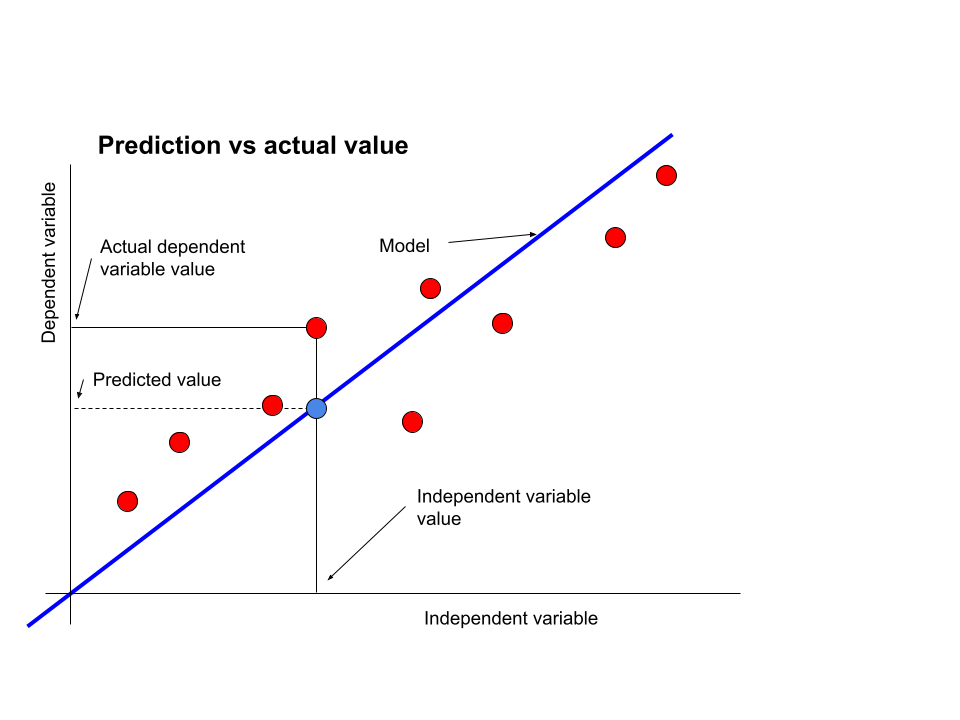

The next image shows the residuals, the difference between the actual dependent variable value and the predicted value.

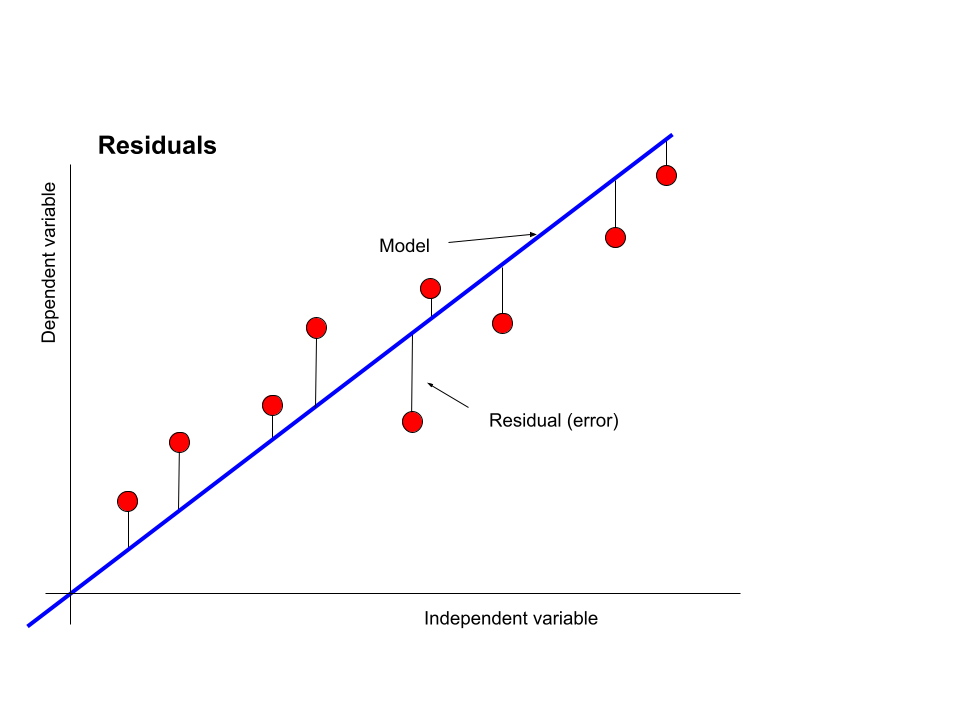

The generation of the model follows processes that aim to minimize the difference between the predictions and the actual values, by considering the sum of the square of the residuals.

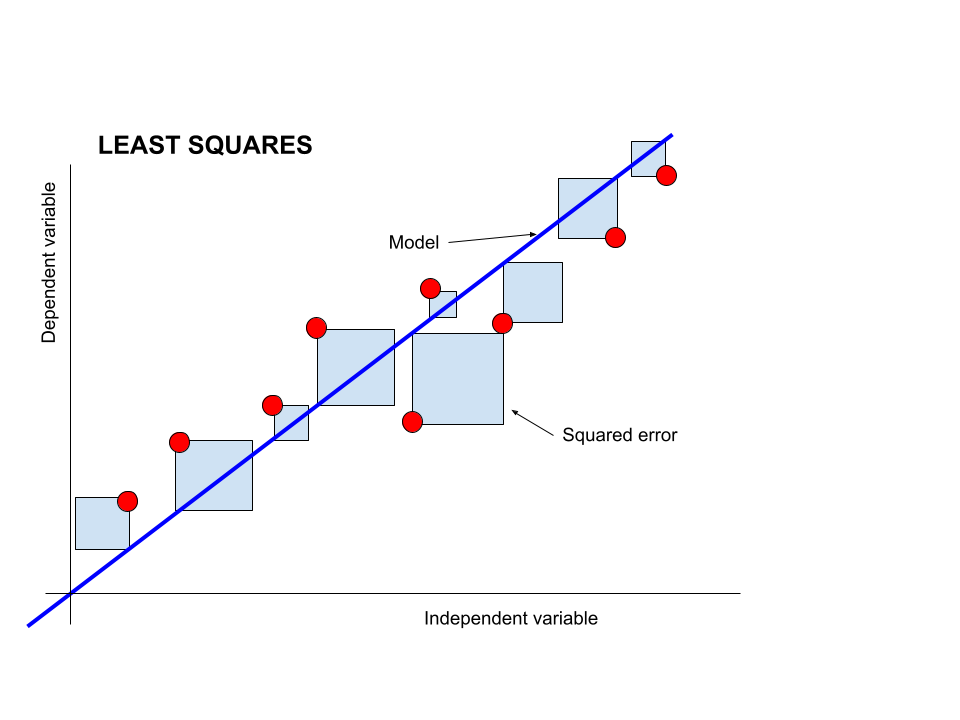

The residuals are squared to generate positive values. Some of the residuals are negative and some are positive. Simply adding them will result in a $0$.

There are various methods of determining the _parameters_ (the intercept $\beta_{0}$ and the slope $\beta_{1}$) of this model (blue line). One method is __ordinary least squares__. It involves the use of linear algebra. The matrix equation is shown below in (6). Here $A$ is the design matrix `X` from above and $\mathbf{y}$ is the vector of dependent variables. The $T$ refers to the transpose of a matrix and the $-1$ refers to the inverse of a matrix.

$$\mathbf{\beta} = {\left( A^{T} A \right)}^{-1} A^{T} \mathbf{y}  \tag{6}$$

Calculus can also be used for the method of __gradient descent__ to find values for the parameters $\beta_{0}$ and $\beta_{1}$ that minimize a cost function.

These techniques are covered in more advanced courses.

Here, though, evaluation of how well this model achieves its aim of minimizing the residuals, is done by way of calculating the __coefficient of determination__, $R^{2}$, shown in (7) below, where $s^{2}$ is the variance.

$$R^{2} = \frac{{s^{2}}_{\text{mean model residuals}} - {s^{2}}_{\text{best model residuals}}}{{s^{2}}_{\text{mean model residuals}}} \tag{7}$$

From (7) it is noted that two models are required, a __mean model__ and a __best model__. These are created in the next section.

### MODEL BASED ON THE MEAN OF THE DEPENDENT VARIABLE

The simplest prediction of the dependent variable is its mean. Given any independent variable value, the mean of the dependent variable is used as predicted value.

In [37]:
# Mean of the dependent variable
mean_dependent = np.mean(dependent)
mean_dependent

np.float64(90.456)

The model is represented as a line on the scatter plot below.

In [38]:
go.Figure(
    data=(
        go.Scatter(
            x=df.Independent,
            y=df.Dependent,
            mode='markers',
            name='data',
            marker=dict(size=12)
        )
    )
).add_trace(
    go.Scatter(
        x=[80, 100],
        y=[mean_dependent, mean_dependent],
        mode='lines',
        name='mean model'
    )
).update_layout(
    title='Mean model',
    xaxis=dict(title='Independent variabe'),
    yaxis=dict(title='Dependent variable'),
    width=700
).show()

The first independent variable value on the scatter plot with the _mean model_ above is $80.5$. By the _mean model_, a dependent variable value of $90.456$ (the mean of the dependent variable) is predicted. The residual (difference between the dependent variable and the predicted variable is) $89 - 90.5 = -1.5$. The residuals for all the observations can be calculated.

As mentioned above, some will be negative residuals and some will be positive. Adding them will, by how the mean is calculated, add to $0$. To solve this problem, each residual is squared (squaring any value returns a positive value), giving the variance in the dependent variable.

Below, the variable is assigned to the computer variable `var_mean_model`.

In [39]:
var_mean_model = np.var(dependent)
var_mean_model

np.float64(50.56366400000001)

Now for the best fit model. As mentioned, simple linear regression uses ordinary least squares or gradient descent to calculate a model that minimizes the residuals. Below, the stasmodels package's ordinary least squares method is used.

### `statsmodels` ORDINARY LEAST SQUARES

The `OLS` function of the statsmodels package calculates the best fit model. The target vector and design matrix from above are provided as arguments and then the `fit` method is called.

In [40]:
linear_model = sm.OLS(y, X).fit()

The `summary2` function is used to look at the model.

In [41]:
linear_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.503   
Dependent Variable: Dependent        AIC:                306.0983
Date:               2025-03-25 08:20 BIC:                309.9223
No. Observations:   50               Log-Likelihood:     -151.05 
Df Model:           1                F-statistic:        50.53   
Df Residuals:       48               Prob (F-statistic): 5.02e-09
R-squared:          0.513            Scale:              25.659  
------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept      1.7253   12.5032  0.1380  0.8908  -23.4140  26.8646
Independent    0.9843    0.1385  7.1083  0.0000    0.7059   1.2628
-----------------------------------------------------------------
Omnibus:              0.158        Durbin-Watson:           1.583
Prob(Omnibus):        0.924        Jarque-Bera (JB):        0.365
Skew:                 0.011        Prob(JB):                0.833
Kurtosis:             2.582        Condition No.:           1576 
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

There is a lot of information here. In the middle of the summary, is a table. The first column shows the coefficients of the model. The _y_ intercept (when $x=0$), which is the $\beta_{0}$ from before. The other is the slope of the best fit model, which is the $\beta_{1}$ from before. The line using these values is added to the scatter plot of the data below.

In [42]:
# Gerating x and y values for the line
x_vals = np.arange(80, 100, 0.1)
y_vals = 1.7253 + 0.9843 * x_vals

go.Figure(data=go.Scatter(x=independent, y=dependent,
    mode='markers',
    name='Data',
    marker=dict(size=12))).update_layout(title='Best fit model',
        yaxis=dict(title='Dependent variable'),
        xaxis=dict(title='Independent variable')).add_trace(go.Scatter(
            x=x_vals, y=y_vals,
            name='Best model',
            mode='lines'
        )).update_layout(
            width=700
        )

The $R^{2}$ value, the _F_ statistic, and the _p_ value for the _F_ statistic are also noted. Theese are investigated below. An array of the residuals (difference between the actual and the estimated (predicted) values) is returned using the `resid` attrtibute.

In [43]:
# Residuals of best model
linear_model.resid

array([-8.94929966, -9.22854923,  1.56498957, 10.9542291 ,  1.134075  ,
       -2.90369831,  9.28377684,  0.74913474,  0.11175897,  0.98377684,
       -0.95986135, -1.7207212 , -7.5537977 ,  2.04756913, -0.88197861,
        5.81215652, -2.20546269, -9.83187922, -0.68158106,  8.03504428,
       -2.18491104, -4.57531863, -6.40076588, -5.6005671 , -1.68784348,
       -6.33051239,  7.19160487, -1.63794287,  0.23700744,  6.8743832 ,
        7.09140609, -1.41935437,  1.34307109,  3.37594881, -1.35849452,
       -9.10976196,  3.06831956,  4.12584942,  1.80726093, -4.98667542,
       -1.33031361, -3.36162573, -1.76768938,  6.14307109,  7.27125199,
        3.0526635 ,  2.35716154,  3.21059091, -0.51642193, -0.64107408])

As an aside, the estimated (predicted) dependent variablea can be calculated given the design matrix of the independent variable, using the `predict` method.

In [44]:
# Model predictions given the data
linear_model.predict(X)

array([81.94929966, 95.82854923, 89.13501043, 94.7457709 , 99.765925  ,
       91.10369831, 90.31622316, 81.85086526, 85.78824103, 90.31622316,
       93.85986135, 96.3207212 , 87.9537977 , 81.75243087, 86.18197861,
       98.38784348, 84.70546269, 89.33187922, 98.78158106, 80.96495572,
       92.28491104, 99.17531863, 85.00076588, 91.3005671 , 98.38784348,
       83.13051239, 90.80839513, 95.23794287, 93.66299256, 89.7256168 ,
       84.50859391, 90.11935437, 87.75692891, 89.82405119, 87.65849452,
       97.00976196, 95.63168044, 86.67415058, 91.79273907, 85.88667542,
       89.43031361, 87.46162573, 93.36768938, 87.75692891, 89.52874801,
       94.6473365 , 88.64283846, 98.28940909, 84.01642193, 95.04107408])

As with the _mean model_, the variance in the residuals can also be calculated. It is assigned to the computer variable `var_best_model` below.

In [45]:
# Sum of squared errors for the model
var_best_model = np.var(linear_model.resid)
var_best_model

np.float64(24.6330442993799)

Equation (7) is used to recalculate the $R^{2}$ value.

In [46]:
# R squared
(var_mean_model - var_best_model) / var_mean_model

np.float64(0.5128311053688693)

This value will always be on the interval $\left[ 0,1 \right]$. The model has a coefficient determination of $0.513$. This result is interpreted by noting that the model (the independent variable) explains $51.3$% of the variability in the dependent variable.

### _p_ VALUE OF THE MODEL BASED ON THE _F_ STATISTIC

The _F_ distribution allows for the calculation of a _p_ value for the model. The equation is shown in (8). Here, $\text{p}_{\text{best model}}$ and $\text{p}_{\text{mean model}}$ are the number of parameters in the best (fitted) and in the mean model, and $n$ is the number of observations. These calculations (as they appear in the numerator and denominator of equation (8)) are termed the __degrees of freedom__.

$$F = \frac{\frac{{s^{2}}_{\text{mean model residuals}} - {s^{2}}_{\text{best model residuals}}}{\text{p}_{\text{best model}}-{\text{p}}_{\text{mean model}}}}{\frac{{s^{2}}_{\text{mean model residuals}}}{n - {\text{p}}_{\text{best model}}}} \tag{8}$$

In [47]:
p_best = 2 # Number of parameters in the fitted model
p_mean = 1 # Number of parameters in the model based on the mean
n = len(independent) # Sample size

In [48]:
F = ((var_mean_model - var_best_model) / (p_best - p_mean)) / ((var_best_model) / (n - p_best))
F

np.float64(50.52845805425268)

Below, a _p_ value is calculated from the cumulative distribution function, `cdf`, for the _F_ distribution given the two degrees of freedom values in (8).

In [49]:
# p value for the F statistic given the numerator and denominator degrees of freedom
1 - stats.f.cdf(F, p_best - p_mean, n - p_best)

np.float64(5.017339543833543e-09)

The null hypothesis of the _F_ test is that there is no linear association between the independent variable and the dependent variable. The alternative hypothesis is then that there is a linear association between the independent and the dependent variable.

An arbitray level of significance can be chosen, such as $\alpha=0.05$. This is the type I error rate, the willingness to falsely reject the null hypothesis given that it is true.

The small _p_ value indicates that the null hypothesis is rejected (the _p_ value is less than $\alpha$). There is enough evidence at the $5\%$ level of significane to show that there is a linear relationship between the independent variable and the dependent variable.

Note that the _F_ test is more meaningful if there are more than one indpendent variable. The alternative hypothesis would then be that at least one of the independent variables is linearly associated with the dependent variable. The _p_ values of the individual coefficients can then be interrogated to determine which of them are linearly associated with the dependent variable.

### DIAGNOSTICS

There are underlying assumptions that must be met for the use of linear regression in this way. The model that was built is linear and it might be that the relationship between the variables is not linear. This can become evident when plotting the residuals for each independent variable.

In [50]:
# Assign the residuals to a variable
residuals = linear_model.resid # The residuals

In [51]:
# Plot the residuals
go.Figure(data=go.Scatter(x=independent, y=residuals,
    mode='markers',
    name='Residuals',
    marker=dict(size=12))).update_layout(title='Residual plot',
        yaxis=dict(title='Residuals'),
        xaxis=dict(title='Independent variable')).add_trace(go.Scatter(
            x=[np.min(independent), np.max(independent)],
            y=[0, 0],
            name='Zero line',
            mode='lines'
        )).update_layout(
            width=700
        )

A fairly even spread (above and below the zero line) of the residuals across the values for the independent variable is noted. There does not seem to be a pattern in the spread, i.e. for some values of the independent variable most of the residuals are on one side of the zero line. There are also no obvious outliers.

If there is no pattern or indication of non-linearity, no correlation between the independent variable and the residuals should be noted.

In [52]:
stats.pearsonr(
    independent,
    residuals
)

PearsonRResult(statistic=np.float64(1.536964999715451e-15), pvalue=np.float64(0.9999999999999915))

The correlation coefficient is $0$, indicating no correlation.

The residuals might also show a sideways pyramidal shape (being much higer and lower at one end of the independent variable scale and very close to the zero line as we move to the opposite side of the independent variable. This may indicate __heteroscedasticity__.

There is a relationship between the standard deviation of the residuals, $s_{\text{res}}$, and the standard deviation of the dependent variable, $s_{Y}$ , shown in (9).

$$s_{\text{res}} = \sqrt{1 - r^{2}} \times s_{Y} \tag{9}$$

## MULTIVARIABLE LINEAR REGRESSION

More independent variables can be added to a linear regression model. A linear regression model with more than one independent variable is known as a __multivariable linear regression model__. Below, two variables and a dependent variable are created and a pandas dataframe object is generated from the results.

In [53]:
# Generating numpy arrays with random values
var1 = np.random.randint(low=100, high=200, size=100) / 10
var2 = np.random.randn(100)
dependent = var1 + var2 + (np.random.randn(100) * 10)

# Add the arrays to a DataFrame object
df = DataFrame(
    {
        'Variable1':var1,
        'Variable2':var2,
        'Dependent':dependent
    }
)
df[:10]

,Variable1,Variable2,Dependent
0,12.6,0.279735,13.467632
1,16.8,-1.375469,20.499572
2,15.9,-1.222970,28.823384
3,13.9,-2.275574,10.073904
4,13.7,-0.657997,18.849063
5,15.3,-1.473248,17.482040
6,18.8,-0.268454,27.833369
7,15.3,0.196793,21.655858
8,17.6,2.658205,22.102068
9,16.8,-0.432157,10.229066


Below, a scatter plot consisting of the two independent variables on the _x_ and _y_ axes and then the dependent variable as a continuous color is shown.

In [54]:
go.Figure(
    data=go.Scatter(
        x=df.Variable1,
        y=df.Variable2,
        mode='markers',
        marker=dict(
            size=16,
            color=df.Dependent,
            colorscale='Viridis',
            showscale=True
        )
    )
).update_layout(title='Scatter plot of independent variables and heatmap as dependent variable',
                width=700)

A scatter plot of each pair of the three numerical variables can also be created.

In [55]:
px.scatter_matrix(
    df,
    title='Scatter plot matrix'
)

A target vector and a design matrix are created again using the `dmatrices` function in the patsy package.

In [56]:
# Target vector and design matrix
y, X = dmatrices(
    'Dependent ~ Variable1 + Variable2',
    data = df
)

The design matrix with predictor variables is shown below.

In [57]:
X[:5]

array([[ 1.        , 12.6       ,  0.27973452],
       [ 1.        , 16.8       , -1.37546864],
       [ 1.        , 15.9       , -1.2229702 ],
       [ 1.        , 13.9       , -2.27557358],
       [ 1.        , 13.7       , -0.65799655]])

The linear model is created just as before, using the `OLS` function in the statsmodels package. The model is assigned to the `multi_lin_model` computer variable.

In [58]:
# Create the model
multi_lin_model = sm.OLS(y, X).fit()

In [59]:
# Print the summary results
multi_lin_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.285   
Dependent Variable: Dependent        AIC:                747.9717
Date:               2025-03-25 08:20 BIC:                755.7872
No. Observations:   100              Log-Likelihood:     -370.99 
Df Model:           2                F-statistic:        20.72   
Df Residuals:       97               Prob (F-statistic): 3.21e-08
R-squared:          0.299            Scale:              100.72  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept   -17.1805    5.2135  -3.2954  0.0014  -27.5279  -6.8331
Variable1     2.1243    0.3370   6.3036  0.0000    1.4555   2.7932
Variable2     0.1124    0.9418   0.1194  0.9052   -1.7568   1.9817
-----------------------------------------------------------------
Omnibus:               3.344        Durbin-Watson:          1.632
Prob(Omnibus):         0.188        Jarque-Bera (JB):       2.700
Skew:                  -0.280       Prob(JB):               0.259
Kurtosis:              2.422        Condition No.:          81   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

The `multi_lin_model` object has a `resid` attribute (as before). The variance in the mean model (mean of the dependent variable) and in the residuals are assigned to variables below.

In [60]:
# Variance in mean model and working model
var_mean_model = np.var(df.Dependent)
var_best_model = np.var(multi_lin_model.resid)

Equation (7) can now be used to calculate the $R^{2}$ value.

In [61]:
(var_mean_model - var_best_model) / var_mean_model

np.float64(0.29934977168514715)

The values for the _F_ statistic and the _p_ value can also be calculated. The working model has $3$ parameters and the mean model still only has $1$.

In [62]:
p_best = 3
p_mean = 1
n = len(df.Dependent)

The _F_ statistic and the _p_value are calculated below.

In [63]:
# F statistic
F = ((var_mean_model - var_best_model) / (p_best - p_mean)) / ((var_best_model) / (n - p_best))
F

np.float64(20.721414680258178)

In [64]:
# The p value
1 - stats.f.cdf(F, p_best - p_mean, n - p_best)

np.float64(3.212265931029634e-08)

There is enough evidence at the $5\%$ level of significance to show that at least one of the independent variables is linearly associated with the dependent variable. From the _p_ values of the coefficients, it is noted that `Variable2` is linearly associated with the dependent variable, after adjusting for `Variable1`.

## REVISITING THE _t_ TEST

Instead of using Student's _t_ test, the _F_ distribution can be used when comparing two means. Two Python list objects are generated that contain the variable of interest. This represents the same statistical variable for two groups. Both groups of values are from a normal distribution, with a slight difference in mean and standard deviation.

In [65]:
np.random.seed(7) # For reproducible results

groupI = np.random.normal(100, 5, 100)
groupII = np.random.normal(103, 8, 110)
groupAll = np.append(groupI, groupII)

A box plot of the distribution of the variable for each group visualizes the difference.

In [66]:
go.Figure(
    data=go.Box(
        y=groupI,
        name='Group I'
    )
).add_trace(
    go.Box(
        y=groupII,
        name='GroupII'
    )
).update_layout(
    title='Distribution of variable in each group',
    xaxis=dict(title='Group'),
    yaxis=dict(title='Variable value'),
    width=700
)

### STUDENT'S _t_ TEST

The simplest way to compare the means is to use Student's _t_ test, `ttest_ind`, making use of the _t_ distribution and defined degrees of freedom.

In [67]:
stats.ttest_ind(groupI, groupII)

TtestResult(statistic=np.float64(-2.4776956543506845), pvalue=np.float64(0.014019905630597691), df=np.float64(208.0))

Below instead, the _F_ distribution is used to calculate the _p_ value.

### CALCULATING THE _F_ STATISTIC AND _p_ VALUE

The same principles are followed as with the simple linear regression model. Here, though, only the sum of squared residuals is considered (and not the variance and there are, or may be, a different number of samples in each group). The simplest model would represent the sum of squared errors with respect to the mean of all the `Independent` variable values.

In [68]:
# Sum of squared errors with the mean of all the values as model
ss_mean = np.sum((groupAll - np.mean(groupAll))**2)
ss_mean

np.float64(9340.958577034542)

The same is done for each of the two groups. This represents the best fit model.

In [69]:
ss_I = np.sum((groupI - np.mean(groupI))**2)
ss_I

np.float64(2594.5756569559535)

In [70]:
ss_II = np.sum((groupII - np.mean(groupII))**2)
ss_II

np.float64(6478.594592260031)

The best fit model sums the two sum of squared errors.

In [71]:
ss_best = ss_I + ss_II
ss_best

np.float64(9073.170249215986)

The number of parameters in the simple (mean) model is just $1$. There are $2$ means in the best fit model.

In [72]:
# Degrees of freedom for the two models
p_best = 2
p_mean = 1
n = len(groupAll)

The _F_ statistic is now calculated using equation (10).

$$F = \frac{\frac{\text{SS}_{\text{mean model}} - {\text{SS}}_{\text{best model}}}{{\text{p}}_{\text{best model}}-{\text{p}}_{\text{mean model}}}}{\frac{{\text{SS}}_{\text{best model}}}{n - {\text{p}}_{\text{best model}}}} \tag{10}$$

In [73]:
F = ((ss_mean - ss_best) / (p_best - p_mean)) / ((ss_best) / (n - p_best))
F

np.float64(6.13897575558805)

It is left to use the cumulative distribution function for the _F_ distribution given the degrees of freedom in the numerator and the denominator.

In [74]:
1 - stats.f.cdf(F, p_best - p_mean, n - p_best)

np.float64(0.014019905630599294)

This is the same value as calculated using Student's _t_ test.

## ANALYSIS OF VARIANCE

More than two groups can also be compared using analysis of variance (ANOVA). Below, a dataframe object is created with a categorical variable consisting of three sample space elements (generating our three groups), as well as a numerical variable.

In [75]:
np.random.seed(123)
df = DataFrame(
    {'Group':np.random.choice(['A', 'B', 'C'], size=300, replace=True),
    'Variable':np.random.randn(300)})

In [76]:
df[:10] # First 10 observations

,Group,Variable
0,C,0.831080
1,B,0.022368
2,C,-0.069009
3,C,-1.933373
4,A,-0.592466
5,C,-0.944294
6,C,1.301994
7,B,-1.130536
8,C,1.656255
9,B,1.098565


Below, three numpy arrays are extracted for the numerical variable, one for each of the sample space elements of the categorical variable.

In [77]:
groupA = df[df.Group == 'A'].Variable.to_numpy()
groupB = df[df.Group == 'B'].Variable.to_numpy()
groupC = df[df.Group == 'C'].Variable.to_numpy()

The summary statistics of the three groups with respect to the numerical variable is viewed.

In [78]:
df.groupby('Group')['Variable'].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
A,93.0,-0.008760,1.184050,-3.411796,-0.708684,-0.009658,0.677320,2.986487
B,103.0,0.002660,1.033858,-2.339763,-0.767179,0.022368,0.793084,2.382312
C,104.0,0.010071,0.977205,-2.015960,-0.674137,0.135012,0.607356,2.932145


A box plot shows the differences in the distribution of the numerical variable for the three groups.

In [79]:
px.box(
    df,
    x='Group',
    y='Variable',
    title='Variable by group').update_layout(width=700)

### ANOVA

The `f_oneway` function in the scipy stats package can calculate the _p_ for us.

In [80]:
stats.f_oneway(
    groupA,
    groupB,
    groupC
)

F_onewayResult(statistic=np.float64(0.007751139414394867), pvalue=np.float64(0.9922790239231731))

There is a failure to reject the null hypothesis (there are no difference in the means of the variable for the three groups.) The _F_ statistic and the _p_ value are calculated as before.

### CALCULATING THE _F_ STATISTIC AND _p_ VALUE

The sum of squared errors for the mean model is calculated first.

In [81]:
ss_mean = np.sum((df.Variable - np.mean(df.Variable))**2)
ss_mean

np.float64(336.3808045849813)

The sum of squared errors around the individual means are calculated next.

In [82]:
ss_a = np.sum((groupA - np.mean(groupA))**2)
ss_b = np.sum((groupB - np.mean(groupB))**2)
ss_c = np.sum((groupC - np.mean(groupC))**2)

The best model adds these errors.

In [83]:
ss_best = ss_a + ss_b + ss_c
ss_best

np.float64(336.3632476932187)

The mean model has a single parameter and the best model has $3$ (means).

In [84]:
p_mean = 1
p_best = 3
n = len(df.Variable)

Below, the recalculation of the _F_ statistic and the _p_ value are compared.

In [85]:
F = ((ss_mean - ss_best) / (p_best - p_mean)) / ((ss_best) / (n - p_best))
F

np.float64(0.007751139414403642)

In [86]:
1 - stats.f.cdf(F, p_best - p_mean, n - p_best)

np.float64(0.9922790239231496)

## CONCLUSION

Understanding mean models, variance, the best fitted model, residuals, and model parameter numbers, allow for use of the _F_ distribution to great effect.

## Quiz

### Questions

View the data below, that shows data for $100$ observations. There are two continuous numerical variables and a dependent variable.

In [87]:
# Seed the pseudo-random number generator
np.random.seed(12)

# Sample size
n=100

# Create data
wcc = np.round(np.random.normal(15, 5, n), 0)
crp = (wcc * 2) + np.round(np.random.normal(0, 10, n), 0)

lipase = wcc + crp + np.round(np.random.normal(2, 10, n), 0)

# Pandas dataframe obejct
df = DataFrame(
    {'WCC':wcc,
     'CRP':crp,
     'Lipase':lipase}
)

In [88]:
px.scatter_matrix(
    df,
    title='Scatter plot matrix'
)

In [89]:
# Target vector and design matrix
y, X = dmatrices('Lipase ~ WCC + CRP', data = df)

1. Create multiple linear regression model with `WCC` and `CRP` as predictors of `Lipase`.

2. Comment on the _F_ statistic.

3. Comment on the individual coefficients and their _p_ values.

4. Comment on the $R^{2}$ value.

### Solutions

In [90]:
# 1
model = sm.OLS(y, X).fit()

model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.759   
Dependent Variable: Lipase           AIC:                754.2907
Date:               2025-03-25 08:21 BIC:                762.1062
No. Observations:   100              Log-Likelihood:     -374.15 
Df Model:           2                F-statistic:        157.3   
Df Residuals:       97               Prob (F-statistic): 3.61e-31
R-squared:          0.764            Scale:              107.28  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept   2.3741     3.0129    0.7880   0.4326   -3.6056   8.3538
WCC         0.5426     0.2684    2.0213   0.0460    0.0098   1.0754
CRP         1.1827     0.1014   11.6636   0.0000    0.9814   1.3839
-----------------------------------------------------------------
Omnibus:              0.113        Durbin-Watson:           1.936
Prob(Omnibus):        0.945        Jarque-Bera (JB):        0.287
Skew:                 0.029        Prob(JB):                0.866
Kurtosis:             2.744        Condition No.:           96   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

2. The _F_ statistic is large at $157.3$, with a small _p_ value of $0$. There is enough evidence at the $5\%$ level of significance to show that at least one of the indpendent variables is linearly associated with the dependent variable.

3. Only the coefficient for `WCC` has a small _p_ value. There is enough evidence at the $5\%$ level of significance to show that `WCC` is linearly associated with `Lipase` after correcting for `CRP`.

4. The model explains $76.4$ of the variability in the `Lipase` levels.